In [1]:
# Đỗ Công Danh 19146163
# Khai báo và sử dụng các thư viện sau
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

4431872/4422102 [==============================] - 0s 0us/step


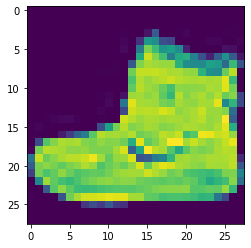

In [2]:
# Sử dụng tập dữ liệu MNIST với bộ dữ liệu đã chia giữa phần train là 60000 và phần test là 10000
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
plt.imshow(x_train[0])
plt.show()

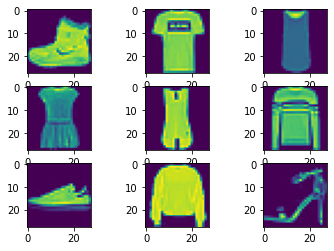

In [3]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
# Xử lý phần dữ liệu đã chia
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#x_train=x_train/255
#x_test=x_test/255
scaler=preprocessing.StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [7]:
# Tạo mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 784 tín hiệu vào (784 hàng và 1 cột) và có 1024 tín hiệu ra sử dụng hàm relu
model.add(Dense(1024,activation='relu',input_shape=(784,)))
# Tạo lớp ẩn thứ hai với 1024 tín hiệu vào, 512 tín hiệu ra (lấy tín hiệu vào là tín hiệu ra của lớp 1)
model.add(Dense(512,activation='relu'))
# Tạo lớp ẩn thứ ba với 512tín hiệu vào, 512 tín hiệu ra (lấy tín hiệu vào là tín hiệu ra của lớp 2)
model.add(Dense(512,activation='relu'))
# Tạo lớp ẩn thứ tư với 512 tín hiệu vào, 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,596,426
Trainable params: 1,596,426
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Biên dịch 
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 128 dữ liệu (batch_size), khi sai số không thay đổi trong 50 lần học thì sẽ dừng học ngay
history= model.fit(x_train, y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Epoch 1/500
375/375 [==============================] - 15s 38ms/step - loss: 0.5325 - accuracy: 0.8105 - val_loss: 0.4234 - val_accuracy: 0.8501
Epoch 2/500
375/375 [==============================] - 14s 37ms/step - loss: 0.3718 - accuracy: 0.8654 - val_loss: 0.3598 - val_accuracy: 0.8768
Epoch 3/500
375/375 [==============================] - 14s 38ms/step - loss: 0.3302 - accuracy: 0.8814 - val_loss: 0.3512 - val_accuracy: 0.8770
Epoch 4/500
375/375 [==============================] - 14s 38ms/step - loss: 0.3094 - accuracy: 0.8885 - val_loss: 0.3711 - val_accuracy: 0.8810
Epoch 5/500
375/375 [==============================] - 14s 38ms/step - loss: 0.2913 - accuracy: 0.8944 - val_loss: 0.4096 - val_accuracy: 0.8726
Epoch 6/500
375/375 [==============================] - 20s 52ms/step - loss: 0.2838 - accuracy: 0.8987 - val_loss: 0.3875 - val_accuracy: 0.8782
Epoch 7/500
375/375 [==============================] - 14s 38ms/step - loss: 0.2716 - accuracy: 0.9058 - val_loss: 0.9466 - val_ac

In [9]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 1.747239589691162
Test Accuracy 0.8899999856948853


<function matplotlib.pyplot.show>

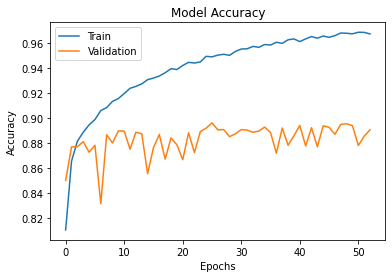

In [10]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show